In [ ]:
#If needed run this for packages
!pip install pandas numpy statsmodels matplotlib


In [ ]:
#PART 1 work on conducting EDA and calculating measures of central tendency 
#and dispersion on the dataset.
import pandas as pd
import numpy as np
from scipy import stats

# Load dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataframe
print(df.head())

# Calculate Measures of Central Tendency
mean_val = df['Column1'].mean()
median_val = df['Column1'].median()
mode_val = df['Column1'].mode()[0]  # Mode might return multiple values

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

# Calculate Measures of Dispersion
range_val = df['Column1'].max() - df['Column1'].min()
variance_val = df['Column1'].var()
std_dev_val = df['Column1'].std()

print(f"Range: {range_val}")
print(f"Variance: {variance_val}")
print(f"Standard Deviation: {std_dev_val}")

# You might also want to include other EDA steps like checking for null values,
# understanding the distribution of your data, and visualizing the data.
print("\nChecking for null values:")
print(df.isnull().sum())

# Describing the data to get an overview
print("\nData Description:")
print(df.describe())

# For visualization, you can use matplotlib or seaborn to plot histograms, box plots, etc.
# Example histogram for 'Column1'
try:
    import matplotlib.pyplot as plt
    df['Column1'].hist(bins=20)
    plt.title('Histogram of Column1')
    plt.xlabel('Column1')
    plt.ylabel('Frequency')
    plt.show()
except ImportError:
    print("matplotlib is not installed. To visualize, please install matplotlib.")



In [ ]:
#Part 2 conduct hypothesis testing on the dataset, 
#applying appropriate tests and interpreting results.

import pandas as pd
from scipy import stats

# Hypothesis Test 1: Compare OverallSatisfactionRating between genders
# Null hypothesis: There is no difference in satisfaction ratings between genders
# Alternative hypothesis: There is a difference in satisfaction ratings between genders

# Checking normality for OverallSatisfactionRating
# We're using the Shapiro-Wilk test for normality here. For large datasets, consider using normaltest or visual inspection
shapiro_gender_male = stats.shapiro(df[df['Gender'] == 'Male']['OverallSatisfactionRating'])
shapiro_gender_female = stats.shapiro(df[df['Gender'] == 'Female']['OverallSatisfactionRating'])

print(f"Shapiro-Wilk Test for Male Satisfaction Ratings: {shapiro_gender_male}")
print(f"Shapiro-Wilk Test for Female Satisfaction Ratings: {shapiro_gender_female}")

# If the p-value is less than 0.05, we reject the null hypothesis of normality
# and should use a non-parametric test instead

# Independent Samples T-Test or Mann-Whitney U Test
if shapiro_gender_male.pvalue > 0.05 and shapiro_gender_female.pvalue > 0.05:
    t_stat, t_p_value = stats.ttest_ind(df[df['Gender'] == 'Male']['OverallSatisfactionRating'],
                                        df[df['Gender'] == 'Female']['OverallSatisfactionRating'])
    print(f"T-Test: t_statistic = {t_stat}, p_value = {t_p_value}")
else:
    u_stat, u_p_value = stats.mannwhitneyu(df[df['Gender'] == 'Male']['OverallSatisfactionRating'],
                                            df[df['Gender'] == 'Female']['OverallSatisfactionRating'])
    print(f"Mann-Whitney U Test: u_statistic = {u_stat}, p_value = {u_p_value}")

    
###BONUS###
# Hypothesis Test 2: Association between MembershipStatus and CustomerLoyaltyScore
# Null hypothesis: There is no association between Membership Status and Customer Loyalty Score
# Alternative hypothesis: There is an association between Membership Status and Customer Loyalty Score

# Chi-Squared Test of Independence
# We're using the pandas crosstab function to create a frequency table
# and then apply the chi-squared test
contingency_table = pd.crosstab(df['MembershipStatus'], df['CustomerLoyaltyScore'])
chi2_stat, chi2_p_value, chi2_dof, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared Test: chi2_stat = {chi2_stat}, p_value = {chi2_p_value}")



In [ ]:
#Part 3 perform regression analysis on 
#the dataset, building and interpreting regression models.

import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('data.csv')

# For regression, we typically need to encode categorical variables as dummy variables (1s and 0s)
# For simplicity, let's assume all the variables we're using are already numeric.

# Defining the dependent and independent variables
X = df[['OverallSatisfactionRating', 'Age', 'PurchaseAmount']]  # Independent variables
y = df['CustomerLoyaltyScore']  # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression
summary = model.summary()
print(summary)

# Interpreting the model output:
# - Look at the R-squared value to see the overall fit.
# - Check the coefficients of each independent variable to understand their impact.
# - The p-values will tell you if the variables are statistically significant.



In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Map the frequency strings to assumed numerical values (days)
frequency_mapping = {
    'daily': 1,
    'weekly': 7,
    'monthly': 30,
    'rarely': 180  # Assuming 'rarely' means once every 6 months
}

# Apply the mapping to the 'Frequency' column
df['NumericalFrequency'] = df['FrequencyofVisits'].map(frequency_mapping)

# Group by this new numerical frequency and calculate the mean CustomerLoyaltyScore
time_series_data = df.groupby('NumericalFrequency')['CustomerLoyaltyScore'].mean()

# Now you have a time series of sorts, though it's not based on actual calendar time
# We can still attempt to model this data with ARIMA, though the interpretation is not typical

# The ARIMA model here is for demonstration purposes. You'll need to determine the (p,d,q) parameters.
arima_model = ARIMA(time_series_data, order=(1,0,1))
arima_results = arima_model.fit()

# Print the summary
print(arima_results.summary())

In [1]:
#PART 1 work on conducting EDA and calculating measures of central tendency 
#and dispersion on the dataset.
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Load dataset
df = pd.read_csv('CustomerData3.csv')

In [3]:
# Display the first few rows of the dataframe
print(df.head())

   CustomerID  Age  Gender  ProductQualityRating  StoreCleanlinessRating  \
0           1   34    Male                     4                       5   
1           2   28  Female                     5                       4   
2           3   42    Male                     3                       3   
3           4   50  Female                     4                       5   
4           5   22    Male                     2                       2   

   StaffFriendlinessRating  OverallSatisfactionRating  PurchaseAmount  \
0                        5                          4          120.50   
1                        4                          5          155.75   
2                        4                          3           75.20   
3                        5                          5          220.00   
4                        3                          2           45.80   

  CustomerLocation FrequencyofVisits ProductCategory MembershipStatus  \
0           Oregon            W

In [5]:
# Calculate Measures of Central Tendency
mean_val = df['PurchaseAmount'].mean()
median_val = df['PurchaseAmount'].median()
mode_val = df['PurchaseAmount'].mode()[0]  # Mode might return multiple values

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

Mean: 104.65365269461078
Median: 87.75
Mode: 110.25


In [6]:
# Calculate Measures of Central Tendency
mean_val = df['CustomerLoyaltyScore'].mean()
median_val = df['CustomerLoyaltyScore'].median()
mode_val = df['CustomerLoyaltyScore'].mode()[0]  # Mode might return multiple values

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

Mean: 77.59904534606206
Median: 78.0
Mode: 88


In [7]:
# Calculate Measures of Central Tendency
mean_val = df['Age'].mean()
median_val = df['Age'].median()
mode_val = df['Age'].mode()[0]  # Mode might return multiple values

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

Mean: 40.585918854415276
Median: 38.0
Mode: 29


In [8]:
# Calculate Measures of Dispersion
range_val = df['PurchaseAmount'].max() - df['PurchaseAmount'].min()
variance_val = df['PurchaseAmount'].var()
std_dev_val = df['PurchaseAmount'].std()

print(f"Range: {range_val}")
print(f"Variance: {variance_val}")
print(f"Standard Deviation: {std_dev_val}")

Range: 293.31
Variance: 5285.0978426370275
Standard Deviation: 72.69867841052564


In [9]:
# Calculate Measures of Dispersion
range_val = df['CustomerLoyaltyScore'].max() - df['CustomerLoyaltyScore'].min()
variance_val = df['CustomerLoyaltyScore'].var()
std_dev_val = df['CustomerLoyaltyScore'].std()

print(f"Range: {range_val}")
print(f"Variance: {variance_val}")
print(f"Standard Deviation: {std_dev_val}")

Range: 32
Variance: 98.08277089160914
Standard Deviation: 9.903674615596433


In [10]:
# Calculate Measures of Dispersion
range_val = df['Age'].max() - df['Age'].min()
variance_val = df['Age'].var()
std_dev_val = df['Age'].std()

print(f"Range: {range_val}")
print(f"Variance: {variance_val}")
print(f"Standard Deviation: {std_dev_val}")

Range: 65
Variance: 202.75664736258315
Standard Deviation: 14.239264284455961


In [11]:
# You might also want to include other EDA steps like checking for null values,
# understanding the distribution of your data, and visualizing the data.
print("\nChecking for null values:")
print(df.isnull().sum())


Checking for null values:
CustomerID                   0
Age                          0
Gender                       0
ProductQualityRating         0
StoreCleanlinessRating       0
StaffFriendlinessRating      0
OverallSatisfactionRating    0
PurchaseAmount               3
CustomerLocation             0
FrequencyofVisits            0
ProductCategory              0
MembershipStatus             0
CustomerLoyaltyScore         0
dtype: int64


In [12]:
# Describing the data to get an overview
print("\nData Description:")
print(df.describe())



Data Description:
       CustomerID         Age  ProductQualityRating  StoreCleanlinessRating  \
count  838.000000  838.000000            838.000000              838.000000   
mean   419.500000   40.585919              3.661098                3.946301   
std    242.054057   14.239264              0.929891                0.876198   
min      1.000000   18.000000              2.000000                2.000000   
25%    210.250000   29.000000              3.000000                3.000000   
50%    419.500000   38.000000              4.000000                4.000000   
75%    628.750000   50.000000              4.000000                5.000000   
max    838.000000   83.000000              5.000000                5.000000   

       StaffFriendlinessRating  OverallSatisfactionRating  PurchaseAmount  \
count               838.000000                 838.000000      835.000000   
mean                  4.189737                   3.742243      104.653653   
std                   0.745221        

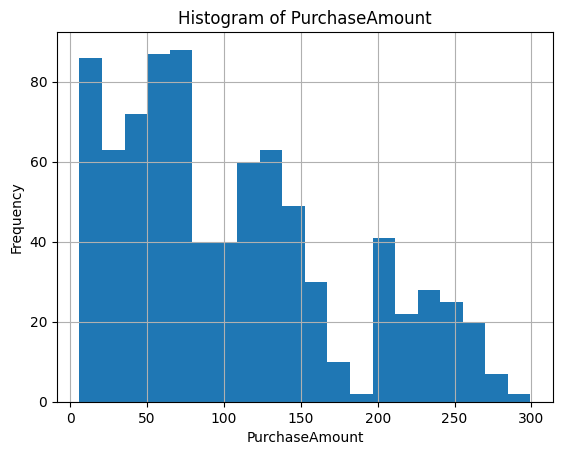

In [13]:
# For visualization, you can use matplotlib or seaborn to plot histograms, box plots, etc.
# Example histogram for 'Column1'
try:
    import matplotlib.pyplot as plt
    df['PurchaseAmount'].hist(bins=20)
    plt.title('Histogram of PurchaseAmount')
    plt.xlabel('PurchaseAmount')
    plt.ylabel('Frequency')
    plt.show()
except ImportError:
    print("matplotlib is not installed. To visualize, please install matplotlib.")


In [17]:
import matplotlib.pyplot as plt
df['CustomerLoyaltyScore'].hist(bins=20)
    plt.title('Histogram of Customer Loyalty Scores')
    plt.xlabel('CustomerLoyaltyScore')
    plt.ylabel('Frequency')
    plt.show()
except ImportError:
    print("matplotlib is not installed. To visualize, please install matplotlib.")

IndentationError: unexpected indent (422016755.py, line 3)

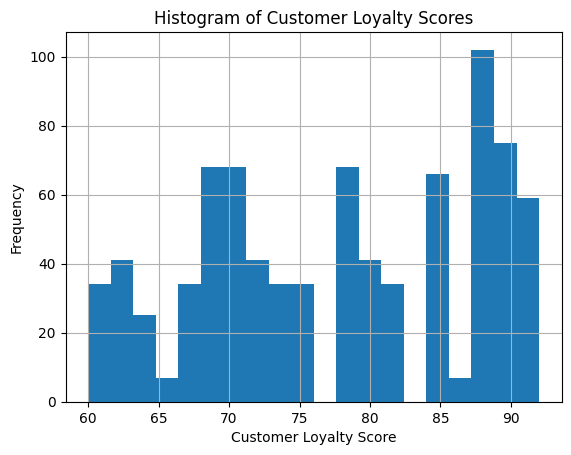

In [18]:
import matplotlib.pyplot as plt

# Creating a histogram of 'CustomerLoyaltyScore'
try:
    df['CustomerLoyaltyScore'].hist(bins=20)
    plt.title('Histogram of Customer Loyalty Scores')
    plt.xlabel('Customer Loyalty Score')
    plt.ylabel('Frequency')
    plt.show()
except ImportError:
    print("matplotlib is not installed. To visualize, please install matplotlib.")

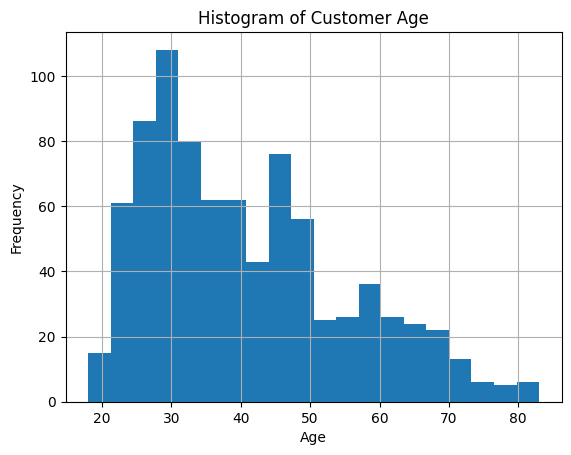

In [19]:
import matplotlib.pyplot as plt

# Creating a histogram of 'Customer Age'
try:
    df['Age'].hist(bins=20)
    plt.title('Histogram of Customer Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
except ImportError:
    print("matplotlib is not installed. To visualize, please install matplotlib.")

In [20]:
#Part 2 conduct hypothesis testing on the dataset, 
#applying appropriate tests and interpreting results.

import pandas as pd
from scipy import stats


In [21]:
# Hypothesis Test 1: Compare OverallSatisfactionRating between genders
# Null hypothesis: There is no difference in satisfaction ratings between genders
# Alternative hypothesis: There is a difference in satisfaction ratings between genders

# Checking normality for OverallSatisfactionRating
# We're using the Shapiro-Wilk test for normality here. For large datasets, consider using normaltest or visual inspection
shapiro_gender_male = stats.shapiro(df[df['Gender'] == 'Male']['OverallSatisfactionRating'])
shapiro_gender_female = stats.shapiro(df[df['Gender'] == 'Female']['OverallSatisfactionRating'])

print(f"Shapiro-Wilk Test for Male Satisfaction Ratings: {shapiro_gender_male}")
print(f"Shapiro-Wilk Test for Female Satisfaction Ratings: {shapiro_gender_female}")

Shapiro-Wilk Test for Male Satisfaction Ratings: ShapiroResult(statistic=np.float64(0.7731970428962002), pvalue=np.float64(1.2462165572386006e-23))
Shapiro-Wilk Test for Female Satisfaction Ratings: ShapiroResult(statistic=np.float64(0.8428829154232363), pvalue=np.float64(5.0385992305566326e-20))


In [22]:
# If the p-value is less than 0.05, we reject the null hypothesis of normality
# and should use a non-parametric test instead

# Independent Samples T-Test or Mann-Whitney U Test
if shapiro_gender_male.pvalue > 0.05 and shapiro_gender_female.pvalue > 0.05:
    t_stat, t_p_value = stats.ttest_ind(df[df['Gender'] == 'Male']['OverallSatisfactionRating'],
                                        df[df['Gender'] == 'Female']['OverallSatisfactionRating'])
    print(f"T-Test: t_statistic = {t_stat}, p_value = {t_p_value}")
else:
    u_stat, u_p_value = stats.mannwhitneyu(df[df['Gender'] == 'Male']['OverallSatisfactionRating'],
                                            df[df['Gender'] == 'Female']['OverallSatisfactionRating'])
    print(f"Mann-Whitney U Test: u_statistic = {u_stat}, p_value = {u_p_value}")

Mann-Whitney U Test: u_statistic = 114394.0, p_value = 1.8045247353255593e-15


In [23]:
#Part 3 perform regression analysis on 
#the dataset, building and interpreting regression models.

import pandas as pd
import statsmodels.api as sm

In [24]:
# Load the dataset
df = pd.read_csv('CustomerData3.csv')

In [25]:
# For regression, we typically need to encode categorical variables as dummy variables (1s and 0s)
# For simplicity, let's assume all the variables we're using are already numeric.

# Defining the dependent and independent variables
X = df[['OverallSatisfactionRating', 'Age', 'PurchaseAmount']]  # Independent variables
y = df['CustomerLoyaltyScore']  # Dependent variable

In [27]:
import statsmodels.api as sm

# Remove rows with missing values in both X and y
X = sm.add_constant(X)  # Add a constant (intercept) to the model
X = X.dropna()
y = y.dropna()

# Align both X and y to ensure rows with missing values are removed from both
X, y = X.align(y, join='inner')

# Building the regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression
summary = model.summary()
print(summary)

ValueError: Must specify axis=0 or 1

In [28]:
import statsmodels.api as sm

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Drop missing values (NaN) in both X and y
X = X.dropna(axis=0)  # Drops rows with missing values
y = y.dropna(axis=0)

# Align X and y after dropping NaN values (inner join ensures consistency)
X, y = X.align(y, join='inner', axis=0)

# Build the regression model
model = sm.OLS(y, X).fit()

# Print the summary
summary = model.summary()
print(summary)

                             OLS Regression Results                             
Dep. Variable:     CustomerLoyaltyScore   R-squared:                       0.443
Model:                              OLS   Adj. R-squared:                  0.441
Method:                   Least Squares   F-statistic:                     220.8
Date:                  Thu, 19 Sep 2024   Prob (F-statistic):          2.68e-105
Time:                          19:31:57   Log-Likelihood:                -2855.4
No. Observations:                   835   AIC:                             5719.
Df Residuals:                       831   BIC:                             5738.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('CustomerData3.csv')

In [30]:
# Map the frequency strings to assumed numerical values (days)
frequency_mapping = {
    'daily': 1,
    'weekly': 7,
    'monthly': 30,
    'rarely': 180  # Assuming 'rarely' means once every 6 months
}

In [31]:
# Apply the mapping to the 'Frequency' column
df['NumericalFrequency'] = df['FrequencyofVisits'].map(frequency_mapping)

In [32]:
# Group by this new numerical frequency and calculate the mean CustomerLoyaltyScore
time_series_data = df.groupby('NumericalFrequency')['CustomerLoyaltyScore'].mean()

In [33]:
# Now you have a time series of sorts, though it's not based on actual calendar time
# We can still attempt to model this data with ARIMA, though the interpretation is not typical

# The ARIMA model here is for demonstration purposes. You'll need to determine the (p,d,q) parameters.
arima_model = ARIMA(time_series_data, order=(1,0,1))
arima_results = arima_model.fit()

# Print the summary
print(arima_results.summary())

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
# Now you have a time series of sorts, though it's not based on actual calendar time
# We can still attempt to model this data with ARIMA, though the interpretation is not typical

# The ARIMA model here is for demonstration purposes. You'll need to determine the (p,d,q) parameters.
arima_model = ARIMA(time_series_data, order=(1,0,1))
arima_results = arima_model.fit()

# Print the summary
print(arima_results.summary())